In [16]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

### theta = - 0.41667 * cos(1.884t) + 1.305 * t
### w = 0.785 * sin(1.884t) + 1.305

### Step Number:850
### Q = 10
### R = 150
### P = 10000

In [171]:
def Wind_EKF_TEST(TimeStamp,phi):

    # N = 400
    # TimeStamp = 10000
    # phi = m.pi

    dt = 2
    t = np.arange(0, TimeStamp-dt, dt)
    N = len(t)

    theta = np.zeros(N)
    for i in range(N):
        theta[i] = -0.41667 * m.cos(1.884 * t[i] + phi)  + 1.305 * t[i]

        if theta[i] > 2 * m.pi:
            theta[i] = theta[i] % (2 * m.pi)

    noise = np.random.normal(loc=0,scale=0.02,size=(1,N))
    z = theta + noise

    Q = 10 ###processNoise 
    R = 170 ###measureNoise
    P = 10000
    x_hat = np.zeros(N)
    phi_show = np.zeros(N)## Standard
    phi_show[0] = phi

    for k in range(0,N):
        P = P + Q

        H =  0.785 * m.sin(1.884*t[k] + x_hat[k-1]) + 1.305

        # H = np.zeros(1)
        # H[0] = Temp_H

        K = P * H / ( H* P * H + R)

        delta_z = -0.41667 * m.cos(1.884 * t[k] + x_hat[k-1]) + 1.305 * t[k]

        if delta_z > 2 * m.pi:
            delta_z = delta_z % (2 * m.pi)

        x_hat[k] = x_hat[k-1] + K * (z[0][k] - delta_z)

        if x_hat[k] > 2 * m.pi:
            x_hat[k] = x_hat[k] % (2 * m.pi)
        
        if x_hat[k] < 0:
            u = - ((x_hat[k]) //(2 * m.pi))
            x_hat[k] = x_hat[k] + (2 * m.pi) * u
            
        P = (1 - K * H) * P

        phi_show[k] = phi


    plt.plot(t,x_hat)
    plt.plot(t,phi_show)
  


    #print(dt)
    #plt.savefig("phi_predict_2pi.jpg",dpi=800)

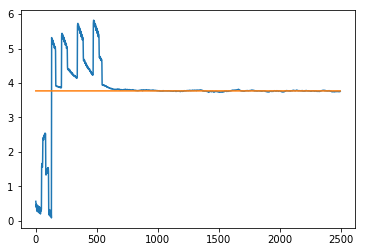

In [172]:
Wind_EKF_TEST(2500, 1.2 * m.pi)